New Code with pickle

In [1]:
import pandas as pd
import pickle

# Load the data
try:
    with open("data/county_donnegal.pkl", "rb") as f:
        county_donnegal = pickle.load(f)
except FileNotFoundError:
    county_donnegal = pd.read_csv("data/dly2075_donnegal-finner.csv")
    county_donnegal["date"] = pd.to_datetime(county_donnegal["date"])
    county_donnegal = county_donnegal[(county_donnegal["date"].dt.year >= 2018) & (county_donnegal["date"].dt.year <= 2022)]


In [2]:
county_donnegal = county_donnegal.loc[:, ~county_donnegal.columns.str.startswith(('ind', 'file'))]

In [3]:
# Assuming df is the name of your dataframe
county_donnegal= county_donnegal.replace(r'\s+', 777444, regex=True)


In [4]:
for column in county_donnegal.columns:
    # get the indices of the rows that contain 777444
    indices = county_donnegal[county_donnegal[column] == 777444].index.tolist()
    
    # get the date column values for those indices
    dates = county_donnegal.loc[indices, 'date'].tolist()
    
    # print the results
    print(f'The value of 777444 occurred {len(indices)} times in {column} on the following dates: {dates}.')

The value of 777444 occurred 0 times in date on the following dates: [].
The value of 777444 occurred 0 times in maxtp on the following dates: [].
The value of 777444 occurred 0 times in mintp on the following dates: [].
The value of 777444 occurred 0 times in igmin on the following dates: [].
The value of 777444 occurred 0 times in gmin on the following dates: [].
The value of 777444 occurred 0 times in rain on the following dates: [].
The value of 777444 occurred 0 times in cbl on the following dates: [].
The value of 777444 occurred 0 times in wdsp on the following dates: [].
The value of 777444 occurred 0 times in hm on the following dates: [].
The value of 777444 occurred 0 times in ddhm on the following dates: [].
The value of 777444 occurred 0 times in hg on the following dates: [].
The value of 777444 occurred 1826 times in soil on the following dates: [Timestamp('2018-01-01 00:00:00'), Timestamp('2018-01-02 00:00:00'), Timestamp('2018-01-03 00:00:00'), Timestamp('2018-01-04 00

In [5]:
#drop the column soil
county_donnegal.drop('soil', axis=1, inplace=True)

In [6]:
county_donnegal[["glorad","hm","ddhm"]] = county_donnegal[["glorad","hm","ddhm"]].astype("int64")

In [8]:
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_donnegal[columns_to_convert] = county_donnegal[columns_to_convert].astype(float)


In [9]:
#county_donnegal = county_donnegal.drop(["soil","igmin"], axis=1)
county_donnegal = county_donnegal.drop(["igmin"], axis=1)

In [11]:
with open("data/county_donnegalrainfallamt.pkl", "wb") as f:
        pickle.dump(county_donnegal, f)

In [12]:
import pandas as pd
import pickle

with open("data/county_donnegalrainfallamt.pkl", "rb") as f:
    county_donnegal = pickle.load(f)

In [13]:
print(county_donnegal.dtypes)

date      datetime64[ns]
maxtp            float64
mintp            float64
gmin             float64
rain             float64
cbl              float64
wdsp             float64
hm                 int64
ddhm               int64
hg                 int64
pe               float64
evap             float64
smd_wd           float64
smd_md           float64
smd_pd           float64
glorad             int64
dtype: object


In [13]:
county_donnegal['rainfall_class'] = county_donnegal['rain'] != 0

Starting point from loading Pkl file

In [15]:
import pandas as pd
import pickle

with open("data/county_donnegalrainfallamt.pkl", "rb") as f:
    county_donnegal = pickle.load(f)


In [16]:
county_donnegal.head()

,date,maxtp,mintp,igmin,gmin,rain,cbl,wdsp,hm,ddhm,hg,pe,evap,smd_wd,smd_md,smd_pd,glorad,rainfall_class
2531,2018-01-01,8.1,4.1,0,3.3,4.1,992.6,18.7,33,290,45,0.9,1.2,0.0,-3.2,-10.0,122,True
2532,2018-01-02,8.8,3.9,0,1.1,15.1,985.2,16.0,38,290,51,0.8,1.1,0.0,-10.0,-10.0,96,True
2533,2018-01-03,9.4,5.6,0,4.2,7.6,983.8,23.7,35,250,52,0.8,1.2,0.0,-6.8,-10.0,85,True
2534,2018-01-04,7.6,1.7,0,0.9,13.2,984.4,12.3,24,280,38,0.4,0.5,0.0,-10.0,-10.0,148,True
2535,2018-01-05,6.8,2.2,0,-0.2,2.8,990.2,7.0,14,240,21,0.2,0.3,0.0,-2.6,-10.0,245,True


In [17]:
county_donnegal.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
maxtp,1826.0,13.294304,4.630750,0.8,9.800,13.15,16.50,29.3
mintp,1826.0,7.060077,4.332603,-5.1,3.800,7.10,10.60,18.1
gmin,1826.0,5.626342,4.944586,-9.4,1.700,5.90,9.50,17.5
rain,1826.0,3.383187,5.090059,0.0,0.000,1.20,4.80,44.4
cbl,1826.0,1007.911829,12.685860,963.7,999.325,1009.25,1016.90,1043.8
wdsp,1826.0,10.201205,4.694540,2.6,6.600,9.20,13.00,32.4
hm,1826.0,18.211939,7.034669,5.0,13.000,17.00,22.00,48.0
ddhm,1826.0,213.132530,83.949371,0.0,140.000,240.00,280.00,350.0
hg,1826.0,26.054217,10.448874,6.0,18.000,24.00,33.00,67.0
pe,1826.0,1.516156,1.005234,0.0,0.700,1.30,2.20,5.7


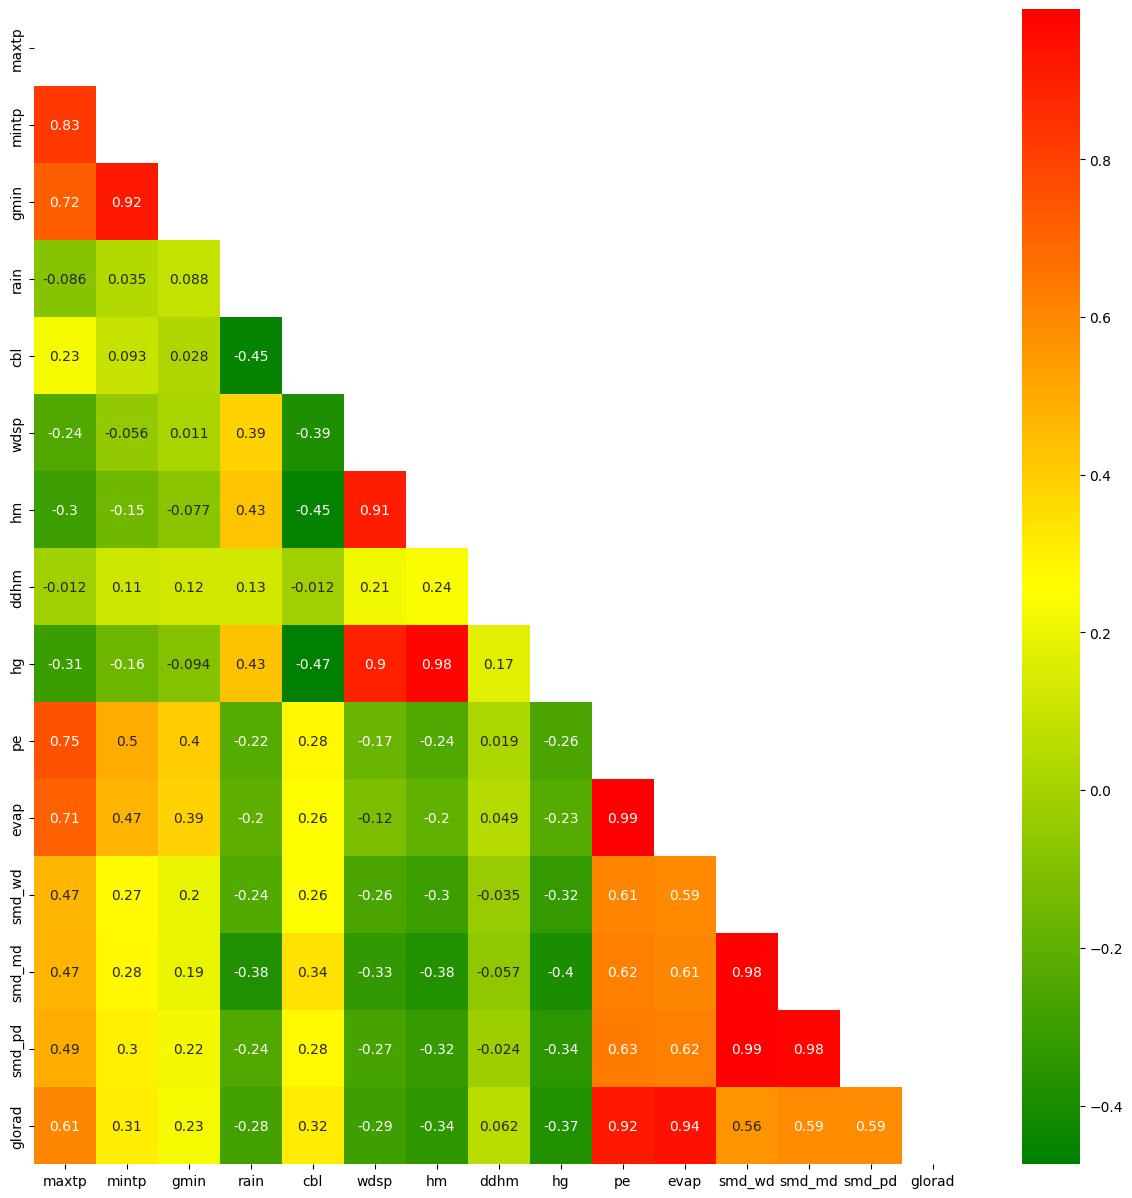

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['green', 'yellow', 'red']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('green_yellow_red', colors)

# Plot correlation matrix for numerical variables in shanon dataset except date,ind.5,ind.4,ind.3,ind.2,ind.1
num_cols = county_donnegal.select_dtypes(include="number").filter(regex='^(?!ind)').columns  
corr = county_donnegal[num_cols].corr(method="pearson")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap=cmap)
plt.savefig("donnegal_heatmap_pearson.png")

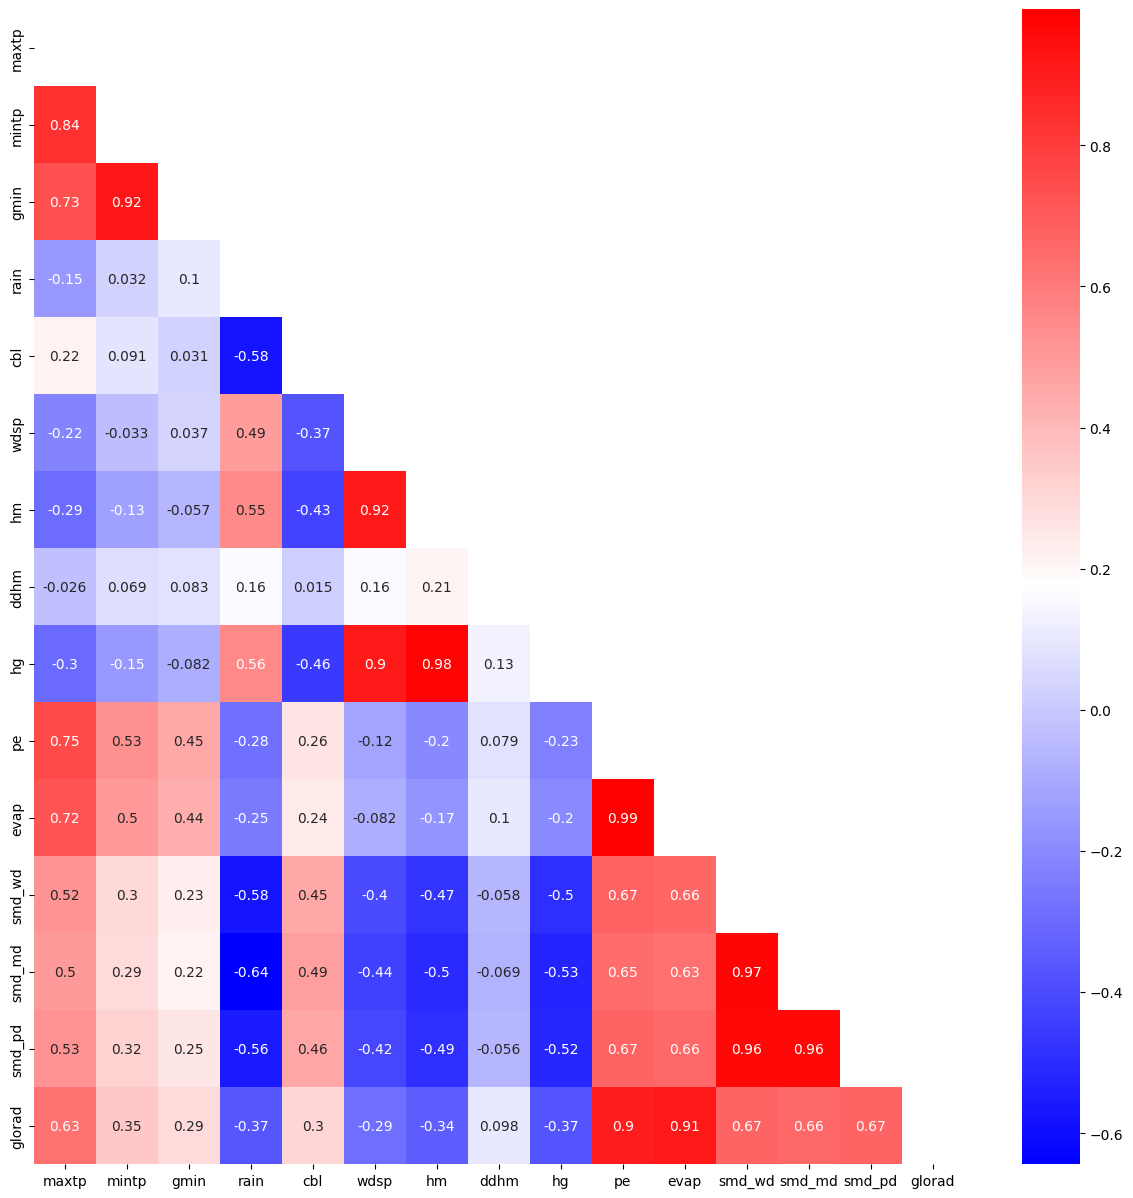

In [19]:
num_cols = county_donnegal.select_dtypes(include="number").filter(regex='^(?!ind)').columns     
corr = county_donnegal[num_cols].corr(method="spearman")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap="bwr")
plt.savefig("donnegal_heatmap_spearman.png")

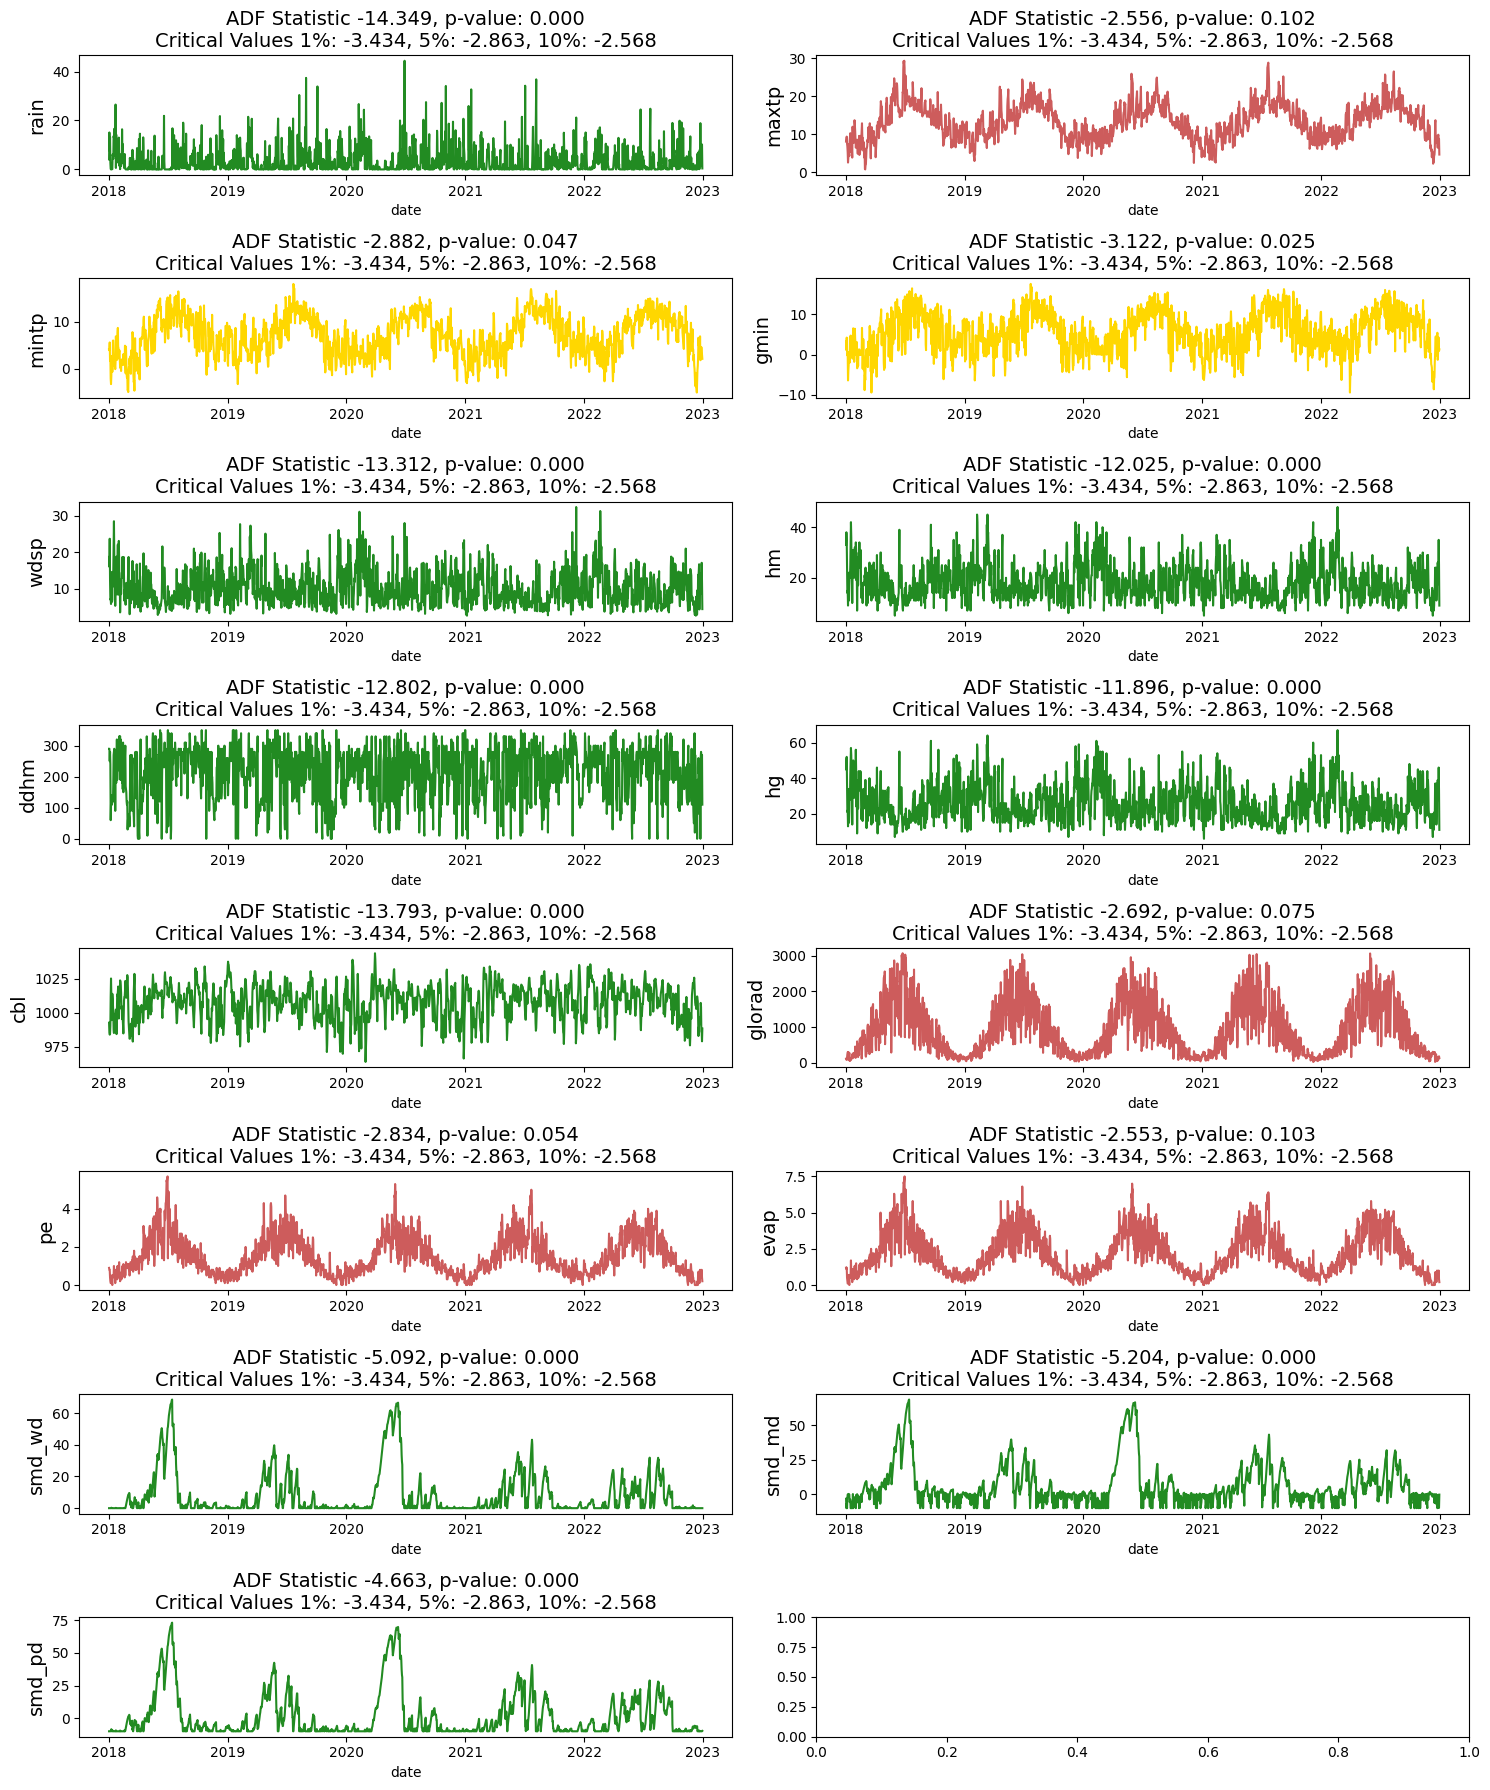

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
fields = ['rain','maxtp','mintp','gmin','wdsp','hm','ddhm','hg','cbl','glorad','pe','evap','smd_wd','smd_md','smd_pd']
f, ax = plt.subplots(nrows=8, ncols=2, figsize=(15, 18))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=county_donnegal.date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

for i, field in enumerate(fields):
    visualize_adfuller_results(county_donnegal[field].values, field, ax[i//2, i%2])

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
from statsmodels.tsa.stattools import kpss
# Define a function to perform KPSS Test on a series
def kpss_test(series, **kwargs):
    statistic, p_value, lags, critical_values = kpss(series, **kwargs)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'  {key} : {value}')
    print('Result: The series is' + (' not' if p_value < 0.05 else '') + ' stationary')

# Perform KPSS Test on each column of the DataFrame
for column in county_donnegal.columns:
    print(f'\nKPSS Test for {column}:')
    kpss_test(county_donnegal[column], regression='c', nlags='auto')


KPSS Test for date:
KPSS Statistic: 6.622851472402865
p-value: 0.01
Num Lags: 27
Critical Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Result: The series is not stationary

KPSS Test for maxtp:
KPSS Statistic: 0.11721355723925987
p-value: 0.1
Num Lags: 26
Critical Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Result: The series is stationary

KPSS Test for mintp:
KPSS Statistic: 0.18402736412433135
p-value: 0.1
Num Lags: 25
Critical Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Result: The series is stationary

KPSS Test for gmin:
KPSS Statistic: 0.2014032704402929
p-value: 0.1
Num Lags: 25
Critical Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Result: The series is stationary

KPSS Test for rain:
KPSS Statistic: 0.1157684236288195
p-value: 0.1
Num Lags: 18
Critical Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Result: The series is stationary

KPSS Test for cbl:
KPSS Statistic: 0.13297630547965425
p

C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up


Training and evaluating model with 7 days of previous rain data:
Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 34.8978
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 27.4159
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 25.9654
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 25.3951
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 25.0869
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 25.2498
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 24.7399
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 24.7010
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 24.3993
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 24.7095
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 24.3766
Epoch 12/200
40/40 [=====================

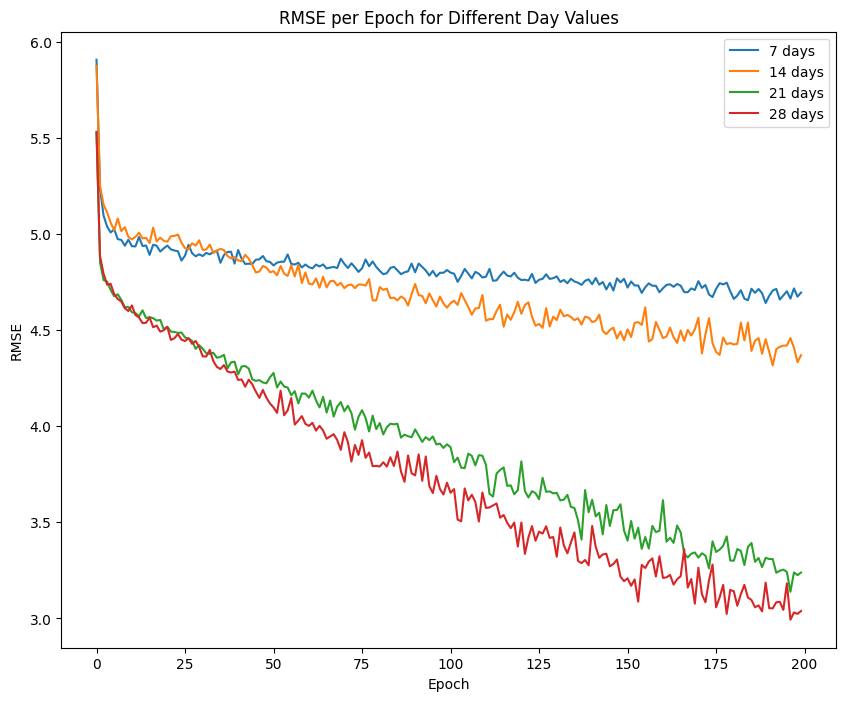

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days):
    # Step 1: Prepare the Data
    # Create rain_previous_day columns
    for i in range(1, days+1):
        county_donnegal[f'rain_previous_day_{i}'] = county_donnegal['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = county_donnegal[features + [target]].copy()

    # Convert date to ordinal
    data['date'] = pd.to_datetime(data['date']).apply(lambda x: x.toordinal())

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 4: Train the Model
    history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

    # Step 5: Evaluate the Model
    y_pred = model.predict(X_test)
    mse = tf.keras.losses.mean_squared_error(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days')

    plt.title('RMSE per Epoch for Different Day Values')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Assuming 'county_donnegal' is your DataFrame with the necessary data
# Test the function with different numbers of days
for days in [7, 14, 21, 28]:
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days)

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)



Training and evaluating model with 7 days of previous rain data:
Epoch 1/1200
40/40 [==============================] - 1s 4ms/step - loss: 34.8609
Epoch 2/1200
40/40 [==============================] - 0s 2ms/step - loss: 27.4988
Epoch 3/1200
40/40 [==============================] - 0s 2ms/step - loss: 25.9869
Epoch 4/1200
40/40 [==============================] - 0s 2ms/step - loss: 25.6401
Epoch 5/1200
40/40 [==============================] - 0s 3ms/step - loss: 25.3083
Epoch 6/1200
40/40 [==============================] - 0s 3ms/step - loss: 25.2630
Epoch 7/1200
40/40 [==============================] - 0s 5ms/step - loss: 25.0675
Epoch 8/1200
40/40 [==============================] - 0s 2ms/step - loss: 25.3210
Epoch 9/1200
40/40 [==============================] - 0s 2ms/step - loss: 25.0078
Epoch 10/1200
40/40 [==============================] - 0s 4ms/step - loss: 24.8404
Epoch 11/1200
40/40 [==============================] - 0s 4ms/step - loss: 24.6116
Epoch 12/1200
40/40 [=========

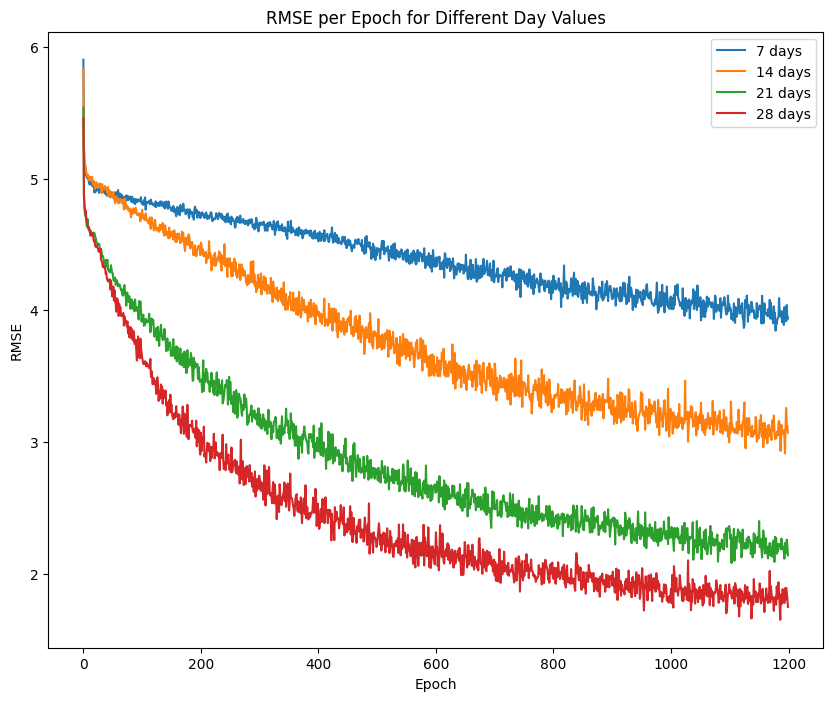

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days):
    # Step 1: Prepare the Data
    # Create rain_previous_day columns
    for i in range(1, days+1):
        county_donnegal[f'rain_previous_day_{i}'] = county_donnegal['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = county_donnegal[features + [target]].copy()

    # Convert date to ordinal
    data['date'] = pd.to_datetime(data['date']).apply(lambda x: x.toordinal())

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 4: Train the Model
    history = model.fit(X_train, y_train, epochs=1200, batch_size=32, verbose=1)

    # Step 5: Evaluate the Model
    y_pred = model.predict(X_test)
    mse = tf.keras.losses.mean_squared_error(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days')

    plt.title('RMSE per Epoch for Different Day Values')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Assuming 'county_clare' is your DataFrame with the necessary data
# Test the function with different numbers of days
for days in [7, 14, 21, 28]:
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days)

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)



Training and evaluating model with 7 days of previous rain data:
Epoch 1/1200
40/40 [==============================] - 1s 2ms/step - loss: 34.5622
Epoch 2/1200
40/40 [==============================] - 0s 2ms/step - loss: 27.2027
Epoch 3/1200
40/40 [==============================] - 0s 2ms/step - loss: 25.5744
Epoch 4/1200
40/40 [==============================] - 0s 2ms/step - loss: 25.3847
Epoch 5/1200
40/40 [==============================] - 0s 2ms/step - loss: 25.2726
Epoch 6/1200
40/40 [==============================] - 0s 2ms/step - loss: 24.8094
Epoch 7/1200
40/40 [==============================] - 0s 2ms/step - loss: 24.8319
Epoch 8/1200
40/40 [==============================] - 0s 2ms/step - loss: 24.6224
Epoch 9/1200
40/40 [==============================] - 0s 2ms/step - loss: 24.6072
Epoch 10/1200
40/40 [==============================] - 0s 3ms/step - loss: 24.7828
Epoch 11/1200
40/40 [==============================] - 0s 2ms/step - loss: 24.3418
Epoch 12/1200
40/40 [=========

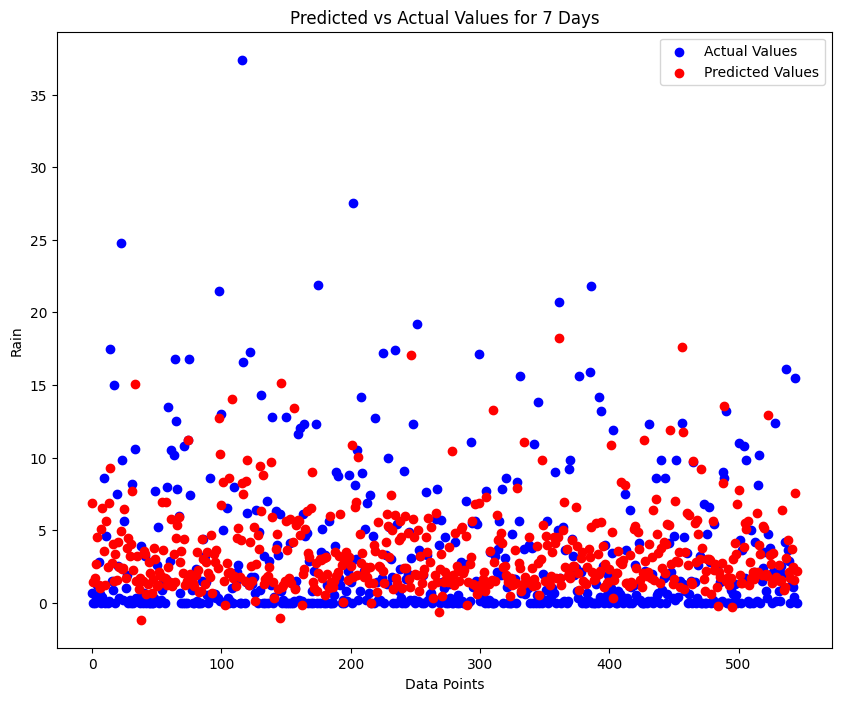


Training and evaluating model with 14 days of previous rain data:
Epoch 1/1200
40/40 [==============================] - 1s 2ms/step - loss: 36.0155
Epoch 2/1200
40/40 [==============================] - 0s 2ms/step - loss: 28.3381
Epoch 3/1200
40/40 [==============================] - 0s 3ms/step - loss: 26.7109
Epoch 4/1200
40/40 [==============================] - 0s 3ms/step - loss: 26.5942
Epoch 5/1200
40/40 [==============================] - 0s 3ms/step - loss: 25.8643
Epoch 6/1200
40/40 [==============================] - 0s 3ms/step - loss: 25.7187
Epoch 7/1200
40/40 [==============================] - 0s 3ms/step - loss: 25.5245
Epoch 8/1200
40/40 [==============================] - 0s 4ms/step - loss: 25.4343
Epoch 9/1200
40/40 [==============================] - 0s 4ms/step - loss: 25.3699
Epoch 10/1200
40/40 [==============================] - 0s 3ms/step - loss: 25.1979
Epoch 11/1200
40/40 [==============================] - 0s 4ms/step - loss: 25.3166
Epoch 12/1200
40/40 [========

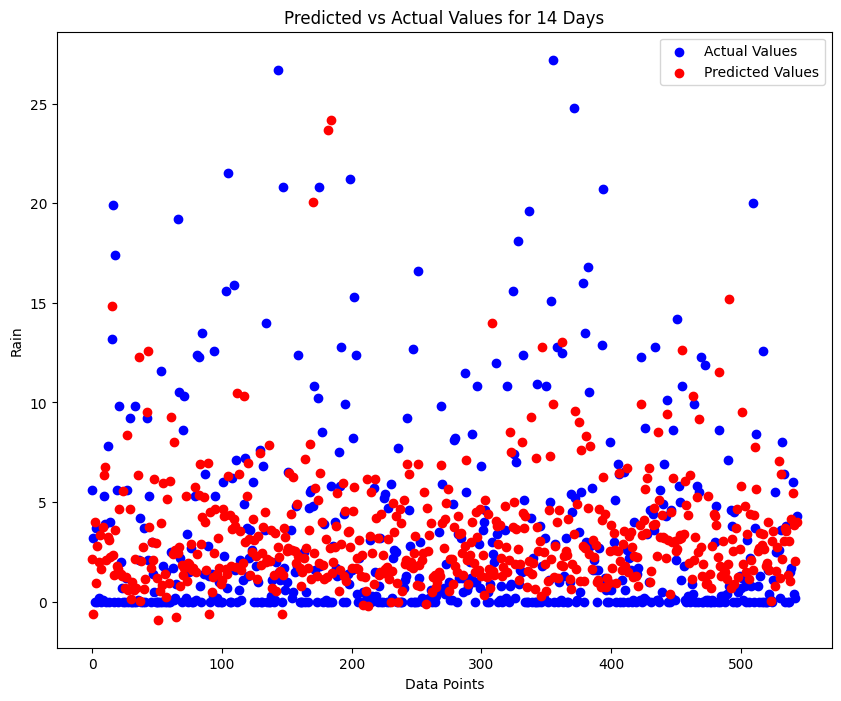


Training and evaluating model with 21 days of previous rain data:
Epoch 1/1200
40/40 [==============================] - 1s 4ms/step - loss: 31.3519
Epoch 2/1200
40/40 [==============================] - 0s 4ms/step - loss: 23.8275
Epoch 3/1200
40/40 [==============================] - 0s 3ms/step - loss: 22.6448
Epoch 4/1200
40/40 [==============================] - 0s 3ms/step - loss: 22.3341
Epoch 5/1200
40/40 [==============================] - 0s 3ms/step - loss: 22.1030
Epoch 6/1200
40/40 [==============================] - 0s 3ms/step - loss: 22.0155
Epoch 7/1200
40/40 [==============================] - 0s 3ms/step - loss: 21.6096
Epoch 8/1200
40/40 [==============================] - 0s 3ms/step - loss: 21.8473
Epoch 9/1200
40/40 [==============================] - 0s 3ms/step - loss: 21.3629
Epoch 10/1200
40/40 [==============================] - 0s 4ms/step - loss: 21.4485
Epoch 11/1200
40/40 [==============================] - 0s 5ms/step - loss: 21.4074
Epoch 12/1200
40/40 [========

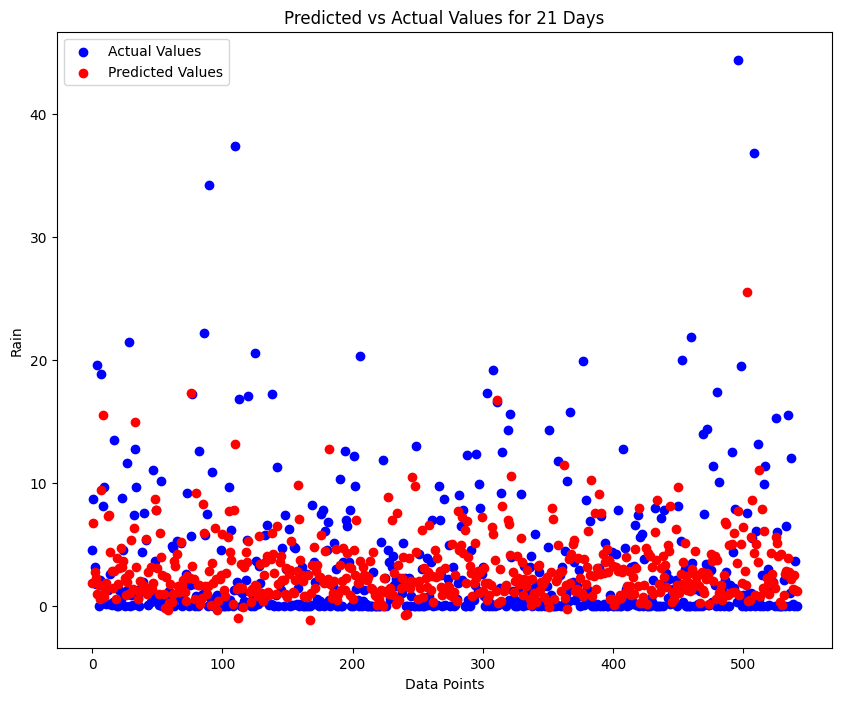


Training and evaluating model with 28 days of previous rain data:
Epoch 1/1200
40/40 [==============================] - 1s 2ms/step - loss: 29.3696
Epoch 2/1200
40/40 [==============================] - 0s 2ms/step - loss: 23.2993
Epoch 3/1200
40/40 [==============================] - 0s 2ms/step - loss: 22.9441
Epoch 4/1200
40/40 [==============================] - 0s 2ms/step - loss: 22.3799
Epoch 5/1200
40/40 [==============================] - 0s 2ms/step - loss: 22.0364
Epoch 6/1200
40/40 [==============================] - 0s 4ms/step - loss: 21.9351
Epoch 7/1200
40/40 [==============================] - 0s 2ms/step - loss: 21.7311
Epoch 8/1200
40/40 [==============================] - 0s 4ms/step - loss: 21.7182
Epoch 9/1200
40/40 [==============================] - 0s 5ms/step - loss: 21.4883
Epoch 10/1200
40/40 [==============================] - 0s 4ms/step - loss: 21.4691
Epoch 11/1200
40/40 [==============================] - 0s 3ms/step - loss: 21.3437
Epoch 12/1200
40/40 [========

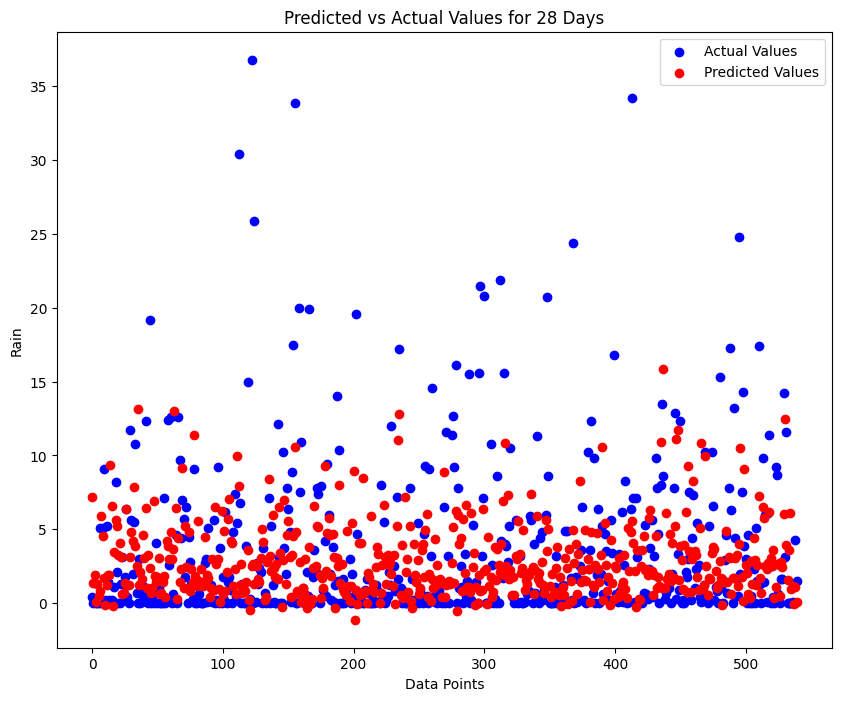

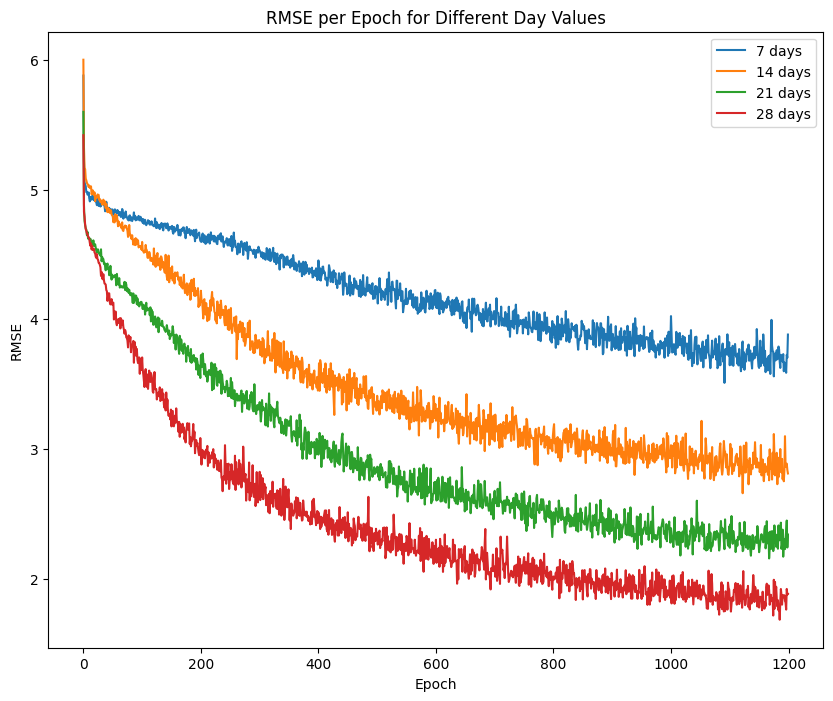

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days):
    # Step 1: Prepare the Data
    # Create rain_previous_day columns
    for i in range(1, days+1):
        county_donnegal[f'rain_previous_day_{i}'] = county_donnegal['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = county_donnegal[features + [target]].copy()

    # Convert date to ordinal
    data['date'] = pd.to_datetime(data['date']).apply(lambda x: x.toordinal())

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 4: Train the Model
    history = model.fit(X_train, y_train, epochs=1200, batch_size=32, verbose=1)

    # Step 5: Evaluate the Model
    y_pred = model.predict(X_test)
    mse = tf.keras.losses.mean_squared_error(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

    plt.figure(figsize=(10, 8))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
    plt.title(f'Predicted vs Actual Values for {days} Days')
    plt.xlabel('Data Points')
    plt.ylabel('Rain')
    plt.legend()
    plt.show()
# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days')

    plt.title('RMSE per Epoch for Different Day Values')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Assuming 'county_clare' is your DataFrame with the necessary data
# Test the function with different numbers of days
for days in [7,14,21,28]:
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days)

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)

